In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

from scipy.stats import kendalltau
from scipy.special import comb
import math

In [3]:
def krcc_test(x, y):
    if len(x) == len(y):
        n = len(x)

        # default scipy is tau_b
        krcc = kendalltau(x, y)
        
        # https://github.com/mmhs013/pyMannKendall this also finds the tau and mann-kendall score but it doesnt do what we want
        
        print("KRCC =", krcc[0])

        # The two-sided p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0
        print("p value =", krcc[1])

    else:
        print("inconsistent number of points in x and y")

In [4]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)

healthorg_df = pd.concat(df_ls, ignore_index = True)

# fix dates

dates = []
for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates

# filter for tweets in first half of 2020
healthorg_df = healthorg_df[healthorg_df["date"] >= datetime.date(2020,3,1)]
healthorg_df = healthorg_df[healthorg_df["date"] <= datetime.date(2020,5,25)]
healthorg_df = healthorg_df.drop_duplicates("tweet")

df_names = []
for line in healthorg_df["username"].unique():
    df_names.append(line)


In [5]:
# Left News Outlets
df_path = glob.glob('./News_Outlets/Left/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

leftnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in leftnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

leftnews_df["date"] = dates

leftnews_df = leftnews_df[leftnews_df["date"] <= datetime.date(2020,6,30)]
leftnews_df = leftnews_df[leftnews_df["date"] >= datetime.date(2020,3,1)]

leftnews_df = leftnews_df.drop_duplicates("tweet")

for line in leftnews_df["username"].drop_duplicates():
    df_names.append(line)

C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Right News Outlets
df_path = glob.glob('./News_Outlets/Right/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

rightnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in rightnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

rightnews_df["date"] = dates

rightnews_df = rightnews_df[rightnews_df["date"] <= datetime.date(2020,6,30)]
rightnews_df = rightnews_df[rightnews_df["date"] >= datetime.date(2020,3,1)]

rightnews_df = rightnews_df.drop_duplicates("tweet")

for line in rightnews_df["username"].drop_duplicates():
    df_names.append(line)

In [9]:
# Right Individuals
df_path = glob.glob('./Right/*.csv')[::2][:6]
trump = pd.read_csv("./Right/trump_tweets.csv") #https://www.kaggle.com/codebreaker619/donald-trump-tweets-dataset
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
        df_ls.append(covid)

    except:
        continue

right_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in right_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

right_df["date"] = dates

right_df = right_df[right_df["date"] <= datetime.date(2020, 5,25)]
right_df = right_df[right_df["date"] >= datetime.date(2020,3,1)]
right_df = right_df.drop_duplicates("tweet")

for line in right_df["username"].drop_duplicates():
    df_names.append(line)

# rename dataset columns to match others
trump["tweet"] = trump["text"]
trump["retweets_count"] = trump["retweets"]
trump["likes_count"] = trump["favorites"]
trump["retweet"] = trump["isRetweet"]
trump = trump[["tweet", "date", "retweets_count", "likes_count", "retweet"]]

#filter dates
trump_dates = trump["date"]
trump_dates_corr = []
trump_dates_corr = [d[:10] for d in trump_dates]
trump_dates_corr = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in trump_dates_corr]
trump_dates_corr = [datetime.datetime.date(d) for d in trump_dates_corr]
trump["date"] = trump_dates_corr

trump = trump[trump["date"] >= datetime.date(2020, 3, 1)]
trump = trump[trump["date"] <= datetime.date(2020, 5,25)]

trump = trump[trump['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

right_df = pd.concat([right_df, trump])

for line in right_df["username"].drop_duplicates().dropna():
    df_names.append(line)


In [10]:
# Left Individuals

df_path = glob.glob('./Left/*.csv')[::2][:7]
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

left_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in left_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

left_df["date"] = dates
left_df = left_df[left_df["date"] <= datetime.date(2020, 5,25)]
left_df = left_df[left_df["date"] >= datetime.date(2020, 3, 1)]
left_df = left_df.drop_duplicates("tweet")

for line in left_df["username"].drop_duplicates():
    df_names.append(line)

In [11]:
# Celebrities

df_path = glob.glob('./Celebrities/*.csv')[::10][:7]
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

celeb_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in celeb_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

celeb_df["date"] = dates
celeb_df = celeb_df[celeb_df["date"] <= datetime.date(2020, 5,25)]
celeb_df = celeb_df[celeb_df["date"] >= datetime.date(2020, 3, 1)]
celeb_df = celeb_df.drop_duplicates("tweet")

for line in celeb_df["username"].drop_duplicates():
    df_names.append(line)

In [12]:
# filtering CMUID

df_cmulabels = pd.read_csv("./fake news/CMU_MisCov19_dataset.csv")[["status_id", "annotation1"]]

df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("irrelevant") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("news") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("politics") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("sarcasm") == False]
df_cmulabels = df_cmulabels[df_cmulabels["annotation1"].str.contains("commercial") == False]

df1 = df_cmulabels[df_cmulabels["annotation1"].str.contains("false") == True]
df2 = df_cmulabels[df_cmulabels["annotation1"].str.contains("fake") == True]
df3 = df_cmulabels[df_cmulabels["annotation1"].str.contains("conspiracy") == True]
df4 = df_cmulabels[df_cmulabels["annotation1"].str.contains("panic") == True]

cmu_fake = pd.concat([df1, df2, df3, df4])

df5 = df_cmulabels[df_cmulabels["annotation1"].str.contains("true") == True]
df6 = df_cmulabels[df_cmulabels["annotation1"].str.contains("emergency") == True]
df7 = df_cmulabels[df_cmulabels["annotation1"].str.contains("correction") == True]

cmu_real = pd.concat([df5, df6, df7])


In [13]:
# filtering FakeNews

df_fakenews = pd.read_csv("./Covid19_FakeNews_Detection-master/data/Language_CSVs/english.csv", index_col=0)

df_fakenews_f = df_fakenews[df_fakenews["label"] == 0]
df_fakenews_r = df_fakenews[df_fakenews["label"] == 1]

<AxesSubplot:>

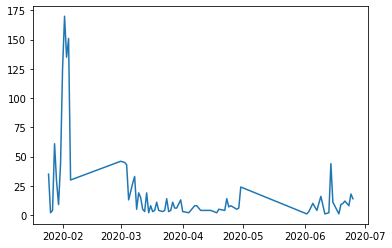

In [14]:
# fake news

CMU_fake = pd.read_csv("./fake news/cmu_fake_hydrated.csv", index_col=0)
detection_fake = pd.read_csv("./Covid19_FakeNews_Detection-master/detection_fake.csv")
#covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0) # add if want to include first two spikes, otherwise comment out and take out of list

fake = [CMU_fake, detection_fake, misinformation, fakeTweets]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2020, 3, 1)]
fake_dfs = fake_dfs[fake_dfs["date"] <= datetime.date(2020,5,25)]
fake_dfs = fake_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    fake_dfs = fake_dfs[fake_dfs["user_screen_name"].str.lower().str.contains(name) == False]

temp = fakeTweets["created_at"]
temp = [date[4:10] + " " + date[-4:] for date in temp]

for i in range(len(temp)):
    test = datetime.datetime.strptime(temp[i], "%b %d %Y")
    temp[i] = test.date()

fakeTweets["date"] = temp
fakeTweets["date"].value_counts().plot()

In [15]:
# real tweets

CMU_real = pd.read_csv("./fake news/cmu_real_hydrated.csv", index_col=0)
realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
detection_real = pd.read_csv("./Covid19_FakeNews_Detection-master/detection_real.csv")

real_dfs = pd.concat([realTweets, CMU_real, detection_real])

real_dfs = real_dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date
dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df
real_dfs["date"] = dates
real_dfs = real_dfs[real_dfs["date"] >= datetime.date(2020, 3, 1)]
real_dfs = real_dfs[real_dfs["date"] <= datetime.date(2020,5,25)]
real_dfs = real_dfs.drop("created_at", axis=1)
real_dfs = real_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    real_dfs = real_dfs[real_dfs["user_screen_name"].str.lower().str.contains(name) == False]


In [27]:
# 1-Day Bin

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
right_dates = right_df.sort_values("date", ascending=True)["date"].value_counts()
left_dates = left_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
eleb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()


In [28]:
# 3-Day Bins

healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
right_df["date"] = pd.to_datetime(right_df["date"])
left_df["date"] = pd.to_datetime(left_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_dfs["date"] = pd.to_datetime(real_dfs["date"])
fake_dfs["date"] = pd.to_datetime(fake_dfs["date"])

health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_dates.count)).resample('3D').count()
right_bins = pd.Series(index=right_df.date, data=np.array(right_df.count)).resample('3D').count()
left_bins = pd.Series(index=left_df.date, data=np.array(left_df.count)).resample('3D').count()
rightnews_bins = pd.Series(index=rightnews_df.date, data=np.array(rightnews_df.count)).resample('3D').count()
leftnews_bins = pd.Series(index=leftnews_df.date, data=np.array(leftnews_df.count)).resample('3D').count()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample('3D').count()
real_bins = pd.Series(index=real_dfs.date, data=np.array(real_dfs.count)).resample('3D').count()
fake_bins = pd.Series(index=fake_dfs.date, data=np.array(fake_dfs.count)).resample('3D').count()


In [38]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nRight News Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_bins), len(left_bins), len(right_bins), len(celeb_bins), len(leftnews_bins), len(rightnews_bins), len(fake_bins), len(real_bins)))


HealthOrg Tweets: 	86
Left Tweets: 	86
Right Tweets: 	86
Celeb Tweets: 	81
Left News Outlet Tweets: 	122
Right News Outlet Tweets: 	122
Fake Tweets:		86
Real Tweets:		86



In [30]:
# only look at similar dates... so length is the same, need to find a better way

print("real and health")
krcc_test(real_bins, health_bins)
print("real and left")
krcc_test(real_bins, left_bins)
print("real and right")
krcc_test(real_bins, right_bins)
print("real and celeb")
krcc_test(real_bins[2:], celeb_bins)
print("real and news")
krcc_test(real_bins, news_bins)


real and health
KRCC = 0.03970235548035083
p value = 0.763810605835433
real and left
KRCC = 0.3383126446713963
p value = 0.010619335609451887
real and right
KRCC = 0.22279260744709262
p value = 0.09415523119502782
real and celeb
KRCC = -0.30023903972197763
p value = 0.05250107801833848
real and news


NameError: name 'news_bins' is not defined

In [31]:
# print("fake and health")
krcc_test(fake_bins, health_bins)
print("fake and left")
krcc_test(fake_bins, left_bins)
print("fake and right")
krcc_test(fake_bins, right_bins)
print("fake and celeb")
krcc_test(fake_bins, celeb_bins)
print("fake and news")
krcc_test(fake_bins, news_bins)

KRCC = -0.0570016330285879
p value = 0.6658392170075844
fake and left
KRCC = 0.2708126772749745
p value = 0.040620119265730024
fake and right
KRCC = 0.3750293003086746
p value = 0.004792619346392512
fake and celeb
inconsistent number of points in x and y
fake and news


NameError: name 'news_bins' is not defined

In [ ]:
# bin using 7 days
health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_dates.count)).resample('7D').count()
right_bins = pd.Series(index=right_df.date, data=np.array(right_df.count)).resample('7D').count()
left_bins = pd.Series(index=left_df.date, data=np.array(left_df.count)).resample('7D').count()
rightnews_bins = pd.Series(index=rightnews_df.date, data=np.array(rightnews_df.count)).resample('7D').count()
leftnews_bins = pd.Series(index=leftnews_df.date, data=np.array(leftnews_df.count)).resample('7D').count()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample('7D').count()
real_bins = pd.Series(index=real_dfs.date, data=np.array(real_dfs.count)).resample('7D').count()
fake_bins = pd.Series(index=fake_dfs.date, data=np.array(fake_dfs.count)).resample('7D').count()

fig, axes = plt.subplots(7, 1, figsize=[30, 20], sharex=True)

print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\Right News Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_bins), len(left_bins), len(right_bins), len(celeb_bins), len(leftnews_bins), len(rightnews_bins), len(fake_bins), len(real_bins)))

In [ ]:
print("real and health")
krcc_test(real_bins, health_bins)
print("real and left")
krcc_test(real_bins, left_bins)
print("real and right")
krcc_test(real_bins, right_bins)
print("real and celeb")
krcc_test(real_bins, celeb_bins)
print("real and news")
krcc_test(real_bins, news_bins)


In [ ]:
krcc_test(fake_bins, health_bins)
print("fake and left")
krcc_test(fake_bins, left_bins)
print("fake and right")
krcc_test(fake_bins, right_bins)
print("fake and celeb")
krcc_test(fake_bins, celeb_bins)
print("fake and news")
krcc_test(fake_bins, news_bins)

In [ ]:
# bin using 2 days
health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_dates.count)).resample('1D').count()
right_bins = pd.Series(index=right_df.date, data=np.array(right_df.count)).resample('1D').count()
left_bins = pd.Series(index=left_df.date, data=np.array(left_df.count)).resample('1D').count()
rightnews_bins = pd.Series(index=rightnews_df.date, data=np.array(rightnews_df.count)).resample('1D').count()
leftnews_bins = pd.Series(index=leftnews_df.date, data=np.array(leftnews_df.count)).resample('1D').count()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample('1D').count()
real_bins = pd.Series(index=real_dfs.date, data=np.array(real_dfs.count)).resample('1D').count()
fake_bins = pd.Series(index=fake_dfs.date, data=np.array(fake_dfs.count)).resample('1D').count()

print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\Right News Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_bins), len(left_bins), len(right_bins), len(celeb_bins), len(leftnews_bins), len(rightnews_bins), len(fake_bins), len(real_bins)))

In [ ]:
print("real and health")
krcc_test(real_bins, health_bins)
print("real and left")
krcc_test(real_bins, left_bins)
print("real and right")
krcc_test(real_bins, right_bins)
print("real and celeb")
krcc_test(real_bins[1:], celeb_bins)
print("real and news")
krcc_test(real_bins, news_bins)

In [37]:
krcc_test(fake_bins, health_bins)
print("fake and left")
krcc_test(fake_bins, left_bins)
print("fake and right")
krcc_test(fake_bins, right_bins)
print("fake and celeb")
krcc_test(fake_bins[1:], celeb_bins)
print("fake and news")
krcc_test(fake_bins, news_bins)

KRCC = -0.046753488814486245
p value = 0.532585362925611
fake and left
KRCC = 0.15869017654875472
p value = 0.035546274982081065
fake and right
KRCC = 0.27375448417835885
p value = 0.0003722783954734124
fake and celeb
inconsistent number of points in x and y
fake and news


NameError: name 'news_bins' is not defined